In [1]:
%matplotlib inline
%pylab inline
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import glob
import sys
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%pdb

Populating the interactive namespace from numpy and matplotlib
Automatic pdb calling has been turned ON


In [2]:
#!/usr/bin/python

#open file
path = "../data/tripdata"
dirs = os.listdir( path )
for file in dirs:
   print(file)
print ( path )
tripdata = "../data/tripdata/Q1_2018.csv"
names=['trip_id' , 'duration', "start_time" , "end_time" ,\
       "start_station" , "start_lat" , "start_lon" , "end_station" , \
       "end_lat" , "end_lon" , "bike_id" , "plan_duration" , \
       "trip_route_category" , "passholder_type"]
d = pd.read_csv(tripdata , names=names)
#d.head(5)

Q1_2017.csv
Q1_2018.csv
Q2_2017.csv
Q2_2018.csv
Q3_2016.csv
Q3_2017.csv
Q4_2016.csv
Q4_2017.csv
Trips_Identifiers.csv
Trips_Identifiers.xlsx
../data/tripdata


In [3]:
d.start_station.head(3)
#this is a test push
#tested

0    start_station
1             3063
2             3063
Name: start_station, dtype: object

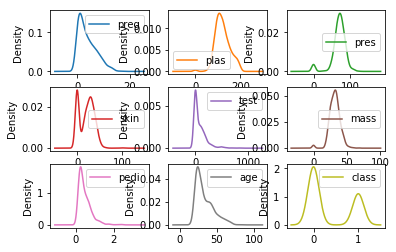

In [4]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(url, names=names)
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()

In [4]:
numericaldata = d.duration,d.bike_id,d.plan_duration
d.plot(kind='density', d.duration)
       #, subplots=True, layout=(1,1),sharex=False)
plt.show()

SyntaxError: positional argument follows keyword argument (<ipython-input-4-1ce491bdf065>, line 2)

In [3]:
# Paths /EML6572/data/stationdata/stations.csv
# /EML6572/data/tripdata/Q1_2018.csv

In [4]:
#import dask.dataframe as dd
#df = dd.read_csv('../data/Q*.csv')


In [5]:
print(os.listdir(path))

['Q1_2017.csv', 'Q1_2018.csv', 'Q2_2017.csv', 'Q2_2018.csv', 'Q3_2016.csv', 'Q3_2017.csv', 'Q4_2016.csv', 'Q4_2017.csv', 'Trips_Identifiers.csv', 'Trips_Identifiers.xlsx']


In [6]:
# Histogram of column data
def plotHistogram(df, nHistogramShown, nHistogramPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nHistRow = (nCol + nHistogramPerRow - 1) / nHistogramPerRow
    plt.figure(num=None, figsize=(6*nHistogramPerRow, 8*nHistRow), dpi=80, facecolor='w', edgecolor='k')
    for i in range(min(nCol, nHistogramShown)):
        plt.subplot(nHistRow, nHistogramPerRow, i+1)
        df.iloc[:,i].hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

In [7]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [8]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
#    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
#        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [9]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# metro-bike-share-trip-data.csv has 132427 rows in reality, but we are only loading/previewing the first 1000 rows

df1 = pd.read_csv('../data/tripdata/Q1_2018.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'Q1_2018.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 14 columns


In [10]:
df1.head(10)



,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type
0,65406367,21,2018-01-01 00:04:00,2018-01-01 00:25:00,3063,34.049198,-118.252831,3018,34.043732,-118.260139,5889,0,One Way,Walk-up
1,65406366,20,2018-01-01 00:05:00,2018-01-01 00:25:00,3063,34.049198,-118.252831,3018,34.043732,-118.260139,6311,0,One Way,Walk-up
2,65406365,19,2018-01-01 00:06:00,2018-01-01 00:25:00,3063,34.049198,-118.252831,3018,34.043732,-118.260139,5753,0,One Way,Walk-up
3,65406364,22,2018-01-01 00:13:00,2018-01-01 00:35:00,3018,34.043732,-118.260139,3031,34.044701,-118.252441,6220,30,One Way,Monthly Pass
4,65406362,45,2018-01-01 00:14:00,2018-01-01 00:59:00,4204,33.988419,-118.451630,4216,34.023392,-118.479637,12436,30,One Way,Monthly Pass
5,65406363,6,2018-01-01 00:14:00,2018-01-01 00:20:00,3063,34.049198,-118.252831,3031,34.044701,-118.252441,11978,30,One Way,Monthly Pass
6,65406361,12,2018-01-01 00:15:00,2018-01-01 00:27:00,4147,34.145248,-118.150070,4148,34.149670,-118.145111,5736,0,One Way,Walk-up
7,65406360,13,2018-01-01 00:18:00,2018-01-01 00:31:00,3006,34.045540,-118.256668,3047,34.039982,-118.266403,6610,0,One Way,Walk-up
8,65406359,8,2018-01-01 00:23:00,2018-01-01 00:31:00,3006,34.045540,-118.256668,3047,34.039982,-118.266403,5761,0,One Way,Walk-up
9,65418678,118,2018-01-01 00:24:00,2018-01-01 02:22:00,4165,34.141750,-118.149063,4165,34.141750,-118.149063,6304,30,Round Trip,Monthly Pass


In [ ]:
plotHistogram(df1, 10 , 5)

KeyboardInterrupt: 

> c:\users\user\anaconda3\lib\site-packages\matplotlib\axes\_base.py(2451)autoscale_view()
   2449             x_stickies = sum([sticky.x for sticky in stickies], [])
   2450             y_stickies = sum([sticky.y for sticky in stickies], [])
-> 2451             if self.get_xscale().lower() == 'log':
   2452                 x_stickies = [xs for xs in x_stickies if xs > 0]
   2453             if self.get_yscale().lower() == 'log':



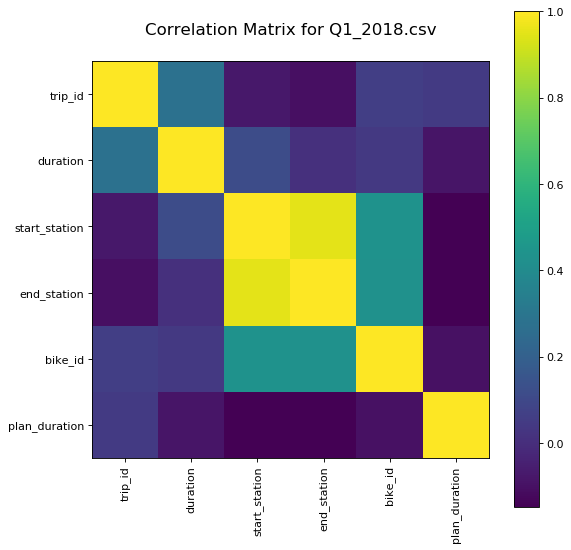

In [14]:
plotCorrelationMatrix(df1, 8)

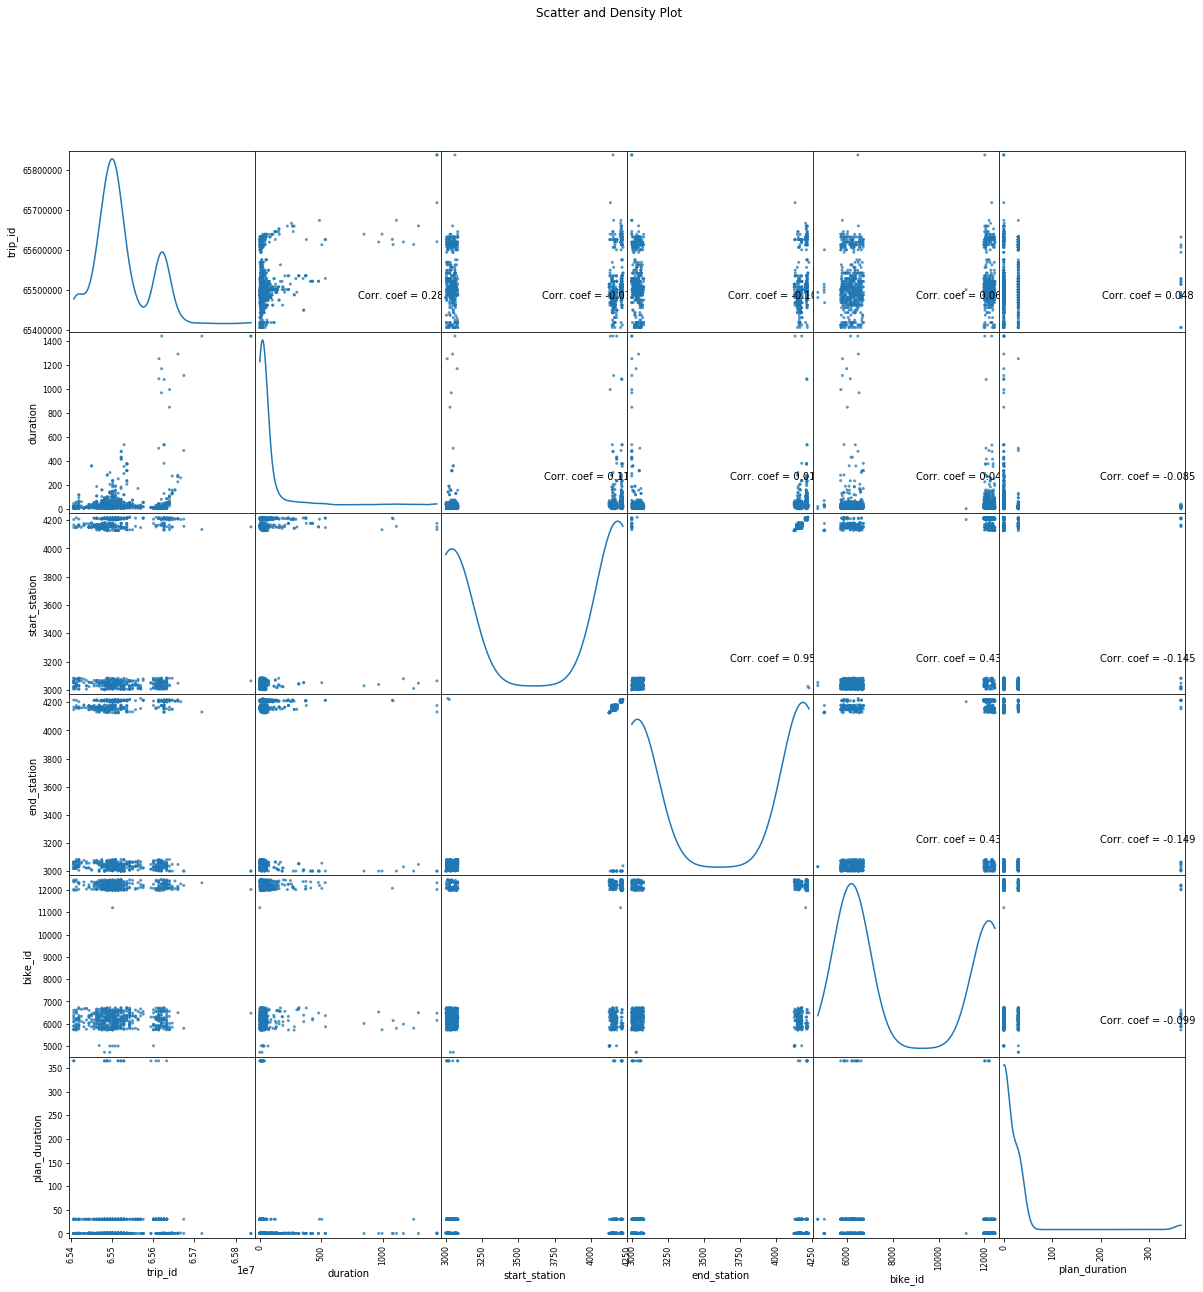

In [12]:
plotScatterMatrix(df1,20,10)

In [ ]:
print ("path")